<a href="https://colab.research.google.com/github/custom-hyper/defi_lama/blob/master/DeFi_Lama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Additional Data set


* New addresses per day/Week/month
* Transactions per day/Week/month
* Daily active users
* Market cap/daily active user
* Market cap Per addresses
* Average gas per user
* Market cap/TVL
* Average daily fees per active user
* TVL/daily active user
* Transactions per daily active user
* Market cap per user
* market cap or transaction*



Install Dependencies

In [ ]:
!pip install requests
!pip install json


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


#DeFi Lama
[Documentation](https://docs.llama.fi/api)


### Protocols

In [ ]:
  #@title ok { display-mode: "code" }
import requests
import datetime
import time
import json
from google.colab import data_table

import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt



#General Information table
response = requests.get("https://api.llama.fi/protocols")
output = response.text
DeFi = json.loads(output)
full_talbe = pd.json_normalize(DeFi)
full_talbe['id'] = full_talbe['symbol']  + '.' + full_talbe['name']
full_talbe['id'].replace(' ','')

full_talbe['tvl']

0       2.067398e+10
1       1.857435e+10
2       1.743685e+10
3       1.514866e+10
4       1.399211e+10
            ...     
1425    0.000000e+00
1426    0.000000e+00
1427    0.000000e+00
1428    0.000000e+00
1429    0.000000e+00
Name: tvl, Length: 1430, dtype: float64

In [ ]:
full_talbe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 286 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    id                                object 
 1    name                              object 
 2    address                           object 
 3    symbol                            object 
 4    url                               object 
 5    description                       object 
 6    chain                             object 
 7    logo                              object 
 8    audits                            object 
 9    audit_note                        object 
 10   gecko_id                          object 
 11   cmcId                             object 
 12   category                          object 
 13   chains                            object 
 14   module                            object 
 15   twitter                           object 
 16   audit_links           

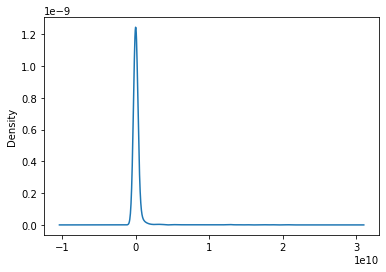

In [ ]:
full_talbe['tvl']
s = pd.Series(full_talbe['tvl'])

ax = s.plot.kde()

### Historical Total Value Locked

*Improvements:*
```
# Create loop for entire coverage
```



In [ ]:
  #@title ok { display-mode: "code" }
import requests
import datetime
import time
import json
from google.colab import data_table

import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt

path = "https://api.llama.fi/protocol/"
slug = 'aave' 
#General Information table
response = requests.get(path + slug)
output = response.text
DeFi = json.loads(output)
full_talbe = pd.json_normalize(DeFi)

tvl = full_talbe['tvl']
tvl



0    [{'date': 1578528000, 'totalLiquidityUSD': 320...
Name: tvl, dtype: object

# Data Warehouse

Steps:
*  Adding FanTom
*  Standardizing Variable



In [ ]:
#Dataset Dictionary

# Create webpage with the links, the sample code to run it, and the last update date
# Create tutorial for people to run the code inside Google Colab
# Create Github page for people to update to the data often

#Arbitrum
Arbitrum_TxGrowth = 'https://1datadirectory.s3.amazonaws.com/arbitrum_scan/export-TxGrowth.csv'
Arbitrum_AddressCount = 'https://1datadirectory.s3.amazonaws.com/arbitrum_scan/export-AddressCount.csv'

#Binance
bsc_AddressCount = 'https://1datadirectory.s3.amazonaws.com/bsc_scan/export-AddressCount.csv'
bsc_bep2etxns = 'https://1datadirectory.s3.amazonaws.com/bsc_scan/export-bep2etxns.csv'
bsc_BlockSize = 'https://1datadirectory.s3.amazonaws.com/bsc_scan/export-BlockSize.csv'
bsc_DailyActiveBEP20Address = 'https://1datadirectory.s3.amazonaws.com/bsc_scan/export-DailyActiveBEP20Address.csv'
bsc_DailyActiveBSCAddress = 'https://1datadirectory.s3.amazonaws.com/bsc_scan/export-DailyActiveBSCAddress.csv'
bsc_GasUsed = 'https://1datadirectory.s3.amazonaws.com/bsc_scan/export-GasUsed.csv'
bsc_TxGrowth = 'https://1datadirectory.s3.amazonaws.com/bsc_scan/export-TxGrowth.csv'

#Ethereum
eth_DailyActiveERC20Address = 'https://1datadirectory.s3.amazonaws.com/etherscan/Ethereum_export-DailyActiveERC20Address.csv'
eth_active_addresses = 'https://1datadirectory.s3.amazonaws.com/etherscan/etherscan_active_addresses_Timeseries.csv'
eth_transaction_fee = 'https://1datadirectory.s3.amazonaws.com/etherscan/etherscan_transaction_fee.csv'
eth_AddressCount = 'https://1datadirectory.s3.amazonaws.com/etherscan/export-AddressCount.csv'
eth_EtherPrice = 'https://1datadirectory.s3.amazonaws.com/etherscan/export-EtherPrice.csv'
eth_Ethersupply2 = 'https://1datadirectory.s3.amazonaws.com/etherscan/export-Ethersupply2.csv'
eth_TxGrowth = 'https://1datadirectory.s3.amazonaws.com/etherscan/export-TxGrowth.csv'
eth_MarketCap = 'https://1datadirectory.s3.amazonaws.com/etherscan/export-MarketCap.csv'
eth_tokenerctxns = 'https://1datadirectory.s3.amazonaws.com/etherscan/export-tokenerc-20txns.csv'

#Coin Metrics
coin_metrics = 'https://1datadirectory.s3.amazonaws.com/coin-metrics/coin_metrics_dataset.csv'

#Polygon
poly_AddressCount = 'https://1datadirectory.s3.amazonaws.com/polygon_scan/polygon_export-AddressCount.csv'
poly_active_address = 'https://1datadirectory.s3.amazonaws.com/polygon_scan/polygon_daily_active_address/polygon_export-DailyActivePOLYAddressh.csv'
poly_TxGrowth = 'https://1datadirectory.s3.amazonaws.com/polygon_scan/polygon_export-TxGrowth.csv'

#Optimism
optimism_TxGrowth = 'https://1datadirectory.s3.amazonaws.com/optimism_scan/optimism_transactions/export-TxGrowth.csv'
optimism_AddressCount = 'https://1datadirectory.s3.amazonaws.com/optimism_scan/optimism_unique_address/optimism_export-AddressCount.csv'

#Fantom
FTM_TxGrowth = 'https://1datadirectory.s3.amazonaws.com/ftmscan/export-TxGrowth.csv'
FTM_AddressCount = 'https://1datadirectory.s3.amazonaws.com/ftmscan/export-AddressCount.csv'





### Market Capitalization

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197038 entries, 2020-12-23 to 2021-11-27
Columns: 149 entries, AdrActCnt to GasUsedTxMean
dtypes: float64(148), object(1)
memory usage: 225.5+ MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197038 entries, 2020-12-23 to 2021-11-27
Data columns (total 149 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    AdrActCnt                    float64
 1    AdrBal1in100KCnt             float64
 2    AdrBal1in100MCnt             float64
 3    AdrBal1in10BCnt              float64
 4    AdrBal1in10KCnt              float64
 5    AdrBal1in10MCnt              float64
 6    AdrBal1in1BCnt               float64
 7    AdrBal1in1KCnt               float64
 8    AdrBal1in1MCnt               float64
 9    AdrBalCnt                    float64
 10   AdrBalNtv0.001Cnt            float64
 11   AdrBalNtv0.01Cnt             float64
 12   AdrBalNtv0.1Cnt              float64
 13   AdrBalNtv100Cnt       

ValueError: ignored

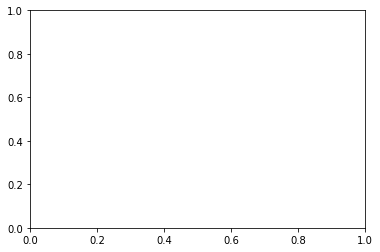

In [ ]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot, dates
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np


# Binance
df = read_csv(coin_metrics,index_col=0,parse_dates=[0])
df.info()
df.info(verbose=True)

df_Ethereum = df[df['ticker']=='ETH']['CapMrktCurUSD']
df_polygon = df[df['ticker']=='MATIC_ETH']['CapMrktCurUSD']
df_Binance = df[df['ticker']=='BNB_MAINNET']['CapMrktCurUSD']



plt.plot('CapMrktCurUSD', 'date', data=df_Ethereum, marker='x', color='grey',linestyle='-', linewidth=1,ms=1.5 )
plt.plot('CapMrktCurUSD', 'date', data=df_polygon, marker='x', color='purple',linestyle='-', linewidth=1,ms=1.5 )
plt.plot('CapMrktCurUSD', 'date', data=df_Binance, marker='x', color='orange',linestyle='-', linewidth=1,ms=1.5 )

plt.show()


df['ticker'].unique()


df = df.rename(columns={"Value":"Binance"})
print(df)
print(df.dtypes)

#Arbitrum
df2 = read_csv(Arbitrum_AddressCount, parse_dates=[1],index_col=1)
df2 = df2.rename(columns={"Value":"Arbitrum"})
print(df2)
print(df2.dtypes)

#Polygon
df3 = read_csv(poly_AddressCount, parse_dates=[0],index_col=0)
df3 = df3.rename(columns={"Value":"Polygon"})
print(df3)
print(df3.dtypes)

#Ethereum
df4 = read_csv(eth_AddressCount, parse_dates=[0],index_col=0)
df4 = df4.rename(columns={"Value":"Ethereum"})
print(df4)
print(df4.dtypes)



plt.plot( 'Binance', 'y1', data=df, marker='x', color='orange',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Ethereum', 'y2', data=df4, marker='x', color='grey',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Polygon', 'y3', data=df3, marker='x', color='purple',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Arbitrum', 'y4', data=df2, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )

plt.xticks(rotation=45)
plt.legend()
plt.title('AddressCount', loc='center',pad=10)

#sns.lineplot(data=df, x="date", y="score")
plt.show()


#Addresses

In [ ]:
df_Ethereum = df[df['ticker']=='ETH']['CapMrktCurUSD']

df_polygon = df[df['ticker']=='MATIC_ETH']['CapMrktCurUSD']

df_Binance['Capitalization'] = df[df['ticker']=='BNB_MAINNET']['CapMrktCurUSD']

df_Binance['address'] = read_csv(bsc_AddressCount, parse_dates=[1],index_col=1)
df_Binance['address'] = df.rename(columns={"Value":"bsc_AddressCount"})
df_Binance['cap_address'] = df_Binance['Capitalization'] / df_Binance['address']
df_Binance['cap_address']

In [ ]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot, dates
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np


# Binance
df = read_csv(bsc_AddressCount, parse_dates=[1],index_col=1)
df = df.rename(columns={"Value":"Binance"})
print(df)
print(df.dtypes)

#Fantom
df2 = read_csv(FTM_AddressCount, parse_dates=[0],index_col=0)
df2 = df2.rename(columns={"Value":"Fantom"})
print(df2)
print(df2.dtypes)

#Polygon
df3 = read_csv(poly_AddressCount, parse_dates=[0],index_col=0)
df3 = df3.rename(columns={"Value":"Polygon"})
print(df3)
print(df3.dtypes)

#Ethereum
df4 = read_csv(eth_AddressCount, parse_dates=[0],index_col=0)
df4 = df4.rename(columns={"Value":"Ethereum"})
print(df4)
print(df4.dtypes)

print(data)

print(data.dtypes)


plt.plot( 'Binance', 'y1', data=df, marker='x', color='orange',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Ethereum', 'y1', data=df4, marker='x', color='grey',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Polygon', 'y2', data=df3, marker='x', color='purple',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Fantom', 'y2', data=df2, marker='x', color='black',linestyle='-', linewidth=1,ms=1.5 )

plt.xticks(rotation=45)
plt.legend()
plt.title('AddressCount', loc='center',pad=10)

#sns.lineplot(data=df, x="date", y="score")
plt.show()

In [ ]:
plt.plot( 'Optimism', 'y2', data=df4, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Arbitrum', 'y3', data=df2, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )
plt.xticks(rotation=45)
plt.legend()
plt.title('AddressCount', loc='center',pad=10)
plt.show()

### Active Addresses

In [ ]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot, dates
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np


# Binance
df = read_csv(bsc_DailyActiveBSCAddress,parse_dates=[1],index_col=1)
df = df.rename(columns={"Value":"Binance"})
print(df)
print(df.dtypes)

#Arbitrum
df2 = read_csv(Arbitrum_TxGrowth, parse_dates=[1],index_col=1)
df2 = df2.rename(columns={"Value":"Arbitrum Unique Address Total Count"})
print(df2)
print(df2.dtypes)

#Polygon
df3 = read_csv(poly_active_address, parse_dates=[0],index_col=0)
df3 = df3.rename(columns={"Value":"Polygon Unique Address Total Count"})
print(df3)
print(df3.dtypes)

#Ethereum
df4 = read_csv(eth_active_addresses, parse_dates=[1],index_col=0)


print(df4.dtypes)









#sns.regplot(x="Date(UTC)", y="Address Count", data=data)
#sns.regplot(x="Date(UTC)", y="Transaction Growth", data=data)
#sns.regplot(x="Date", y="Address Count", data=data)
plt.plot( 'Binance', 'y1', data=df, marker='x', color='orange',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Arbitrum Unique Address Total Count', 'y2', data=df2, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Polygon Unique Address Total Count', 'y3', data=df3, marker='x', color='purple',linestyle='-', linewidth=1,ms=1.5 )
#plt.plot( 'Ethereum', 'y4', data=df4, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )

plt.xticks(rotation=45)
plt.legend()
plt.title('Daily Transactions', loc='center',pad=10)

#sns.lineplot(data=df, x="date", y="score")
plt.show()
df4

#Transactions

In [ ]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot, dates
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np


# Binance
df = read_csv(bsc_TxGrowth,parse_dates=[1],index_col=1)
df = df.rename(columns={"Value":"Binance"})
print(df)
print(df.dtypes)

#Arbitrum
df2 = read_csv(Arbitrum_TxGrowth, parse_dates=[1],index_col=1)
df2 = df2.rename(columns={"Value":"Arbitrum"})
print(df2)
print(df2.dtypes)

#Polygon
df3 = read_csv(poly_TxGrowth, parse_dates=[0],index_col=0)
df3 = df3.rename(columns={"Value":"Polygon"})
print(df3)
print(df3.dtypes)

#Optimism
df4 = read_csv(optimism_TxGrowth, parse_dates=[0],index_col=0)
df4 = df4.rename(columns={"Value":"Optimism"})
print(df4)
print(df4.dtypes)

#Fantom
df5 = read_csv(FTM_TxGrowth, parse_dates=[0],index_col=0)
df5 = df5.rename(columns={"Value":"Fantom"})
print(df5)
print(df5.dtypes)




plt.plot( 'Binance', 'y1', data=df, marker='x', color='orange',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Fantom', 'y2', data=df5, marker='x', color='black',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Polygon', 'y2', data=df3, marker='x', color='purple',linestyle='-', linewidth=1,ms=1.5 )


plt.xticks(rotation=45)
plt.legend()
plt.title('Daily Transactions', loc='center',pad=10)

#sns.lineplot(data=df, x="date", y="score")
plt.show()

In [ ]:
plt.plot( 'Optimism', 'y1', data=df4, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Arbitrum', 'y1', data=df2, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Fantom', 'y2', data=df5, marker='x', color='black',linestyle='-', linewidth=1,ms=1.5 )


plt.xticks(rotation=45)
plt.legend()
plt.title('Daily Transactions', loc='center',pad=10)

#sns.lineplot(data=df, x="date", y="score")
plt.show()